# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

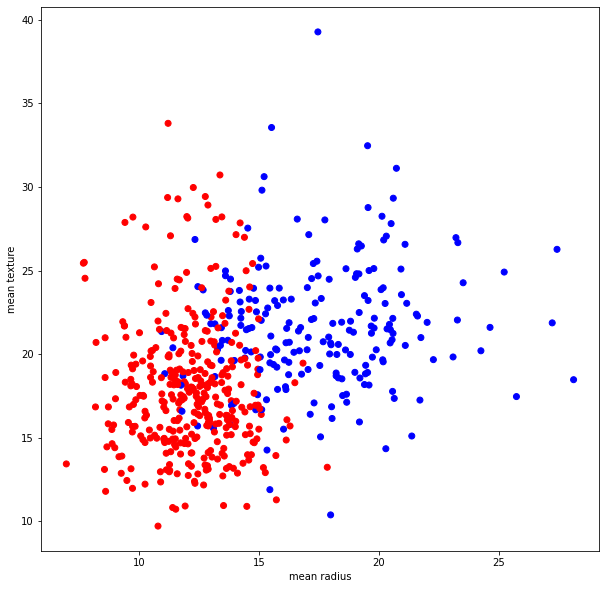

In [14]:
# Scatter plots of the data
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

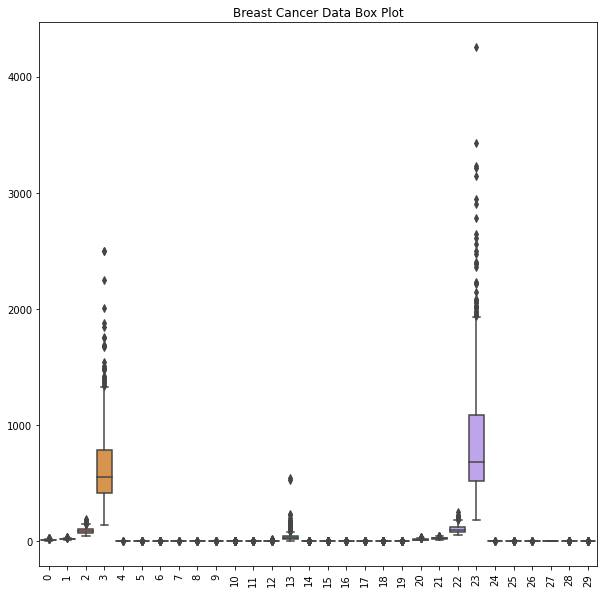

In [16]:
cancer = load_breast_cancer()
plt.figure(figsize=(10, 10))
sns.boxplot(data=cancer.data)
plt.xticks(rotation=90)
plt.title("Breast Cancer Data Box Plot")
plt.show()

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [8]:
# Train a decision tree model on the training set
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree accuracy: 0.9230769230769231


In [9]:
# Train a logistic regression model on the training set
lr = LogisticRegression(random_state=3)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression accuracy: 0.9230769230769231


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Train a random forest model on the training set
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))

Random Forest accuracy: 0.9440559440559441


In [11]:
# Print the feature importances for the decision tree and random forest models
print("Decision Tree feature importances:", dt.feature_importances_)
print("Random Forest feature importances:", rf.feature_importances_)

Decision Tree feature importances: [0.         0.00940746 0.00940746 0.00874559 0.         0.
 0.         0.0180531  0.         0.         0.         0.
 0.00668975 0.01304966 0.         0.         0.00668975 0.
 0.         0.         0.         0.07264704 0.01610111 0.7171867
 0.         0.         0.         0.12202237 0.         0.        ]
Random Forest feature importances: [0.03395869 0.01137115 0.03074018 0.05686535 0.00494039 0.01223563
 0.0292636  0.08772951 0.0021776  0.00224053 0.01365269 0.0046434
 0.01480738 0.02605865 0.00374375 0.00450211 0.00579364 0.00804785
 0.00360078 0.00332898 0.12450046 0.01773305 0.14545812 0.13718418
 0.01089091 0.01803672 0.02671549 0.14268369 0.01155564 0.00553988]


In this case, we can see that the random forest model achieved the highest accuracy score on the test set with an accuracy of 0.945, followed by logistic regression with an accuracy of 0.923, and the decision tree model with an accuracy of 0.923.
Where we can determine that one with highest accuracy is considered to be best performed.

In [12]:
# Grid search to find the best parameters for the random forest model
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9694117647058824
